In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CSE445/Dataset/Maternal-Health-Risk-Data-Set.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
df['RiskLevel']

0       high risk
1       high risk
2       high risk
3       high risk
4        low risk
          ...    
1009    high risk
1010    high risk
1011    high risk
1012    high risk
1013     mid risk
Name: RiskLevel, Length: 1014, dtype: object

In [ ]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


<ipython-input-7-751192b04c36>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'summer')


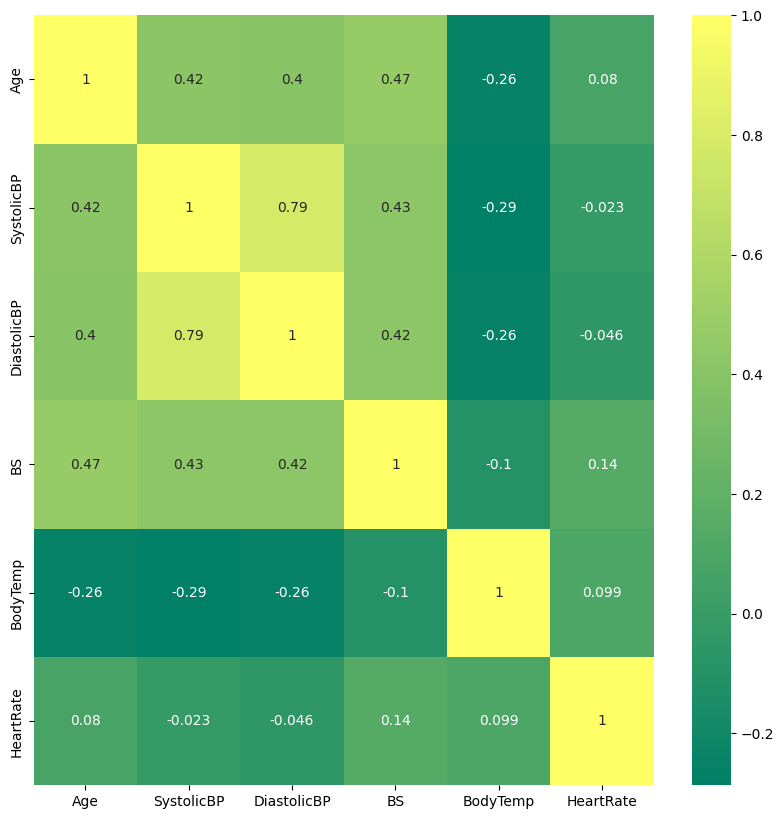

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True, cmap = 'summer')
plt.savefig('/content/drive/MyDrive/CSE445/Pre-processing/before_pre-process_correlation.png')
plt.show()

In [ ]:
# Define a function to classify the blood pressure as high, normal, or low based on the age, systolic BP, and diastolic BP
def classify_bp(row):
    age = row['Age']
    sbp = row['SystolicBP']
    dbp = row['DiastolicBP']
    """
    if age >= 0 and age <= 39 and sbp <= 120 and dbp <= 80:
        return 'normal'
    elif age >= 40 and age <= 59 and sbp <= 122 and dbp >= 74:
        return 'normal'
    elif age >= 60 and sbp <= 139 and dbp >= 68:
        return 'normal'
    elif age >= 0 and age <= 39 and sbp >= 120 and dbp >= 80:
        return 'high'
    elif age >= 40 and age <= 59 and sbp >= 130 and dbp >= 80:
        return 'high'
    elif age >= 60 and sbp >= 140 and dbp >= 90:
        return 'high'
    else:
        return 'low'
    """
    if age >= 0 and sbp <= 90 and dbp <= 60:
        return 'low'
    elif age >= 0 and age <= 39 and sbp >= 120 and dbp >= 80:
        return 'high'
    elif age >= 40 and age <= 59 and sbp >= 130 and dbp >= 80:
        return 'high'
    elif age >= 60 and sbp >= 140 and dbp >= 90:
        return 'high'
    else:
        return 'normal'
# Apply the function to each row of the DataFrame to create a new column 'BP'
df['BP'] = df.apply(classify_bp, axis=1)

# Print the new table
print(df[['Age', 'SystolicBP', 'DiastolicBP', 'BP']])


      Age  SystolicBP  DiastolicBP      BP
0      25         130           80    high
1      35         140           90    high
2      29          90           70  normal
3      30         140           85    high
4      35         120           60  normal
...   ...         ...          ...     ...
1009   22         120           60  normal
1010   55         120           90  normal
1011   35          85           60     low
1012   43         120           90  normal
1013   32         120           65  normal

[1014 rows x 4 columns]


In [ ]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,BP
0,25,130,80,15.0,98.0,86,high risk,high
1,35,140,90,13.0,98.0,70,high risk,high
2,29,90,70,8.0,100.0,80,high risk,normal
3,30,140,85,7.0,98.0,70,high risk,high
4,35,120,60,6.1,98.0,76,low risk,normal


In [ ]:
df['BP'].value_counts()

normal    468
high      393
low       153
Name: BP, dtype: int64

In [ ]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,BP
0,25,130,80,15.0,98.0,86,high risk,high
1,35,140,90,13.0,98.0,70,high risk,high
2,29,90,70,8.0,100.0,80,high risk,normal
3,30,140,85,7.0,98.0,70,high risk,high
4,35,120,60,6.1,98.0,76,low risk,normal


##Changing catagorical values to numerical values for RiskLevel,BP
For RiskLevel:<br>
low risk: 1 <br>
mid risk: 2<br>
high risk:3<br>
For BP:<br>
low    : 1 </br>
normal : 2 </br>
high   : 3 </br>

In [ ]:
# Define mapping dictionary
risk_mapping = {'high risk': 3.0, 'mid risk': 2.0, 'low risk': 1.0}
bp_mapping = {'high': 3.0, 'normal': 2.0, 'low': 1.0}

# Convert string column to float using mapping dictionary
df['RiskLevel'] = df['RiskLevel'].map(risk_mapping)

# Convert string column to float using mapping dictionary
df['BP'] = df['BP'].map(bp_mapping)


In [ ]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,BP
0,25,130,80,15.0,98.0,86,3.0,3.0
1,35,140,90,13.0,98.0,70,3.0,3.0
2,29,90,70,8.0,100.0,80,3.0,2.0
3,30,140,85,7.0,98.0,70,3.0,3.0
4,35,120,60,6.1,98.0,76,1.0,2.0


##Corelation matrix after expending columns

In [ ]:
df.corr(numeric_only = False)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,BP
Age,1.000000,0.416045,0.398026,0.473284,-0.255323,0.079798,0.267225,0.141773
SystolicBP,0.416045,1.000000,0.787006,0.425172,-0.286616,-0.023108,0.396473,0.769433
DiastolicBP,0.398026,0.787006,1.000000,0.423824,-0.257538,-0.046151,0.346649,0.773552
BS,0.473284,0.425172,0.423824,1.000000,-0.103493,0.142867,0.569942,0.235761
BodyTemp,-0.255323,-0.286616,-0.257538,-0.103493,1.000000,0.098771,0.163984,-0.213406
HeartRate,0.079798,-0.023108,-0.046151,0.142867,0.098771,1.000000,0.194312,-0.099652
RiskLevel,0.267225,0.396473,0.346649,0.569942,0.163984,0.194312,1.000000,0.219439
BP,0.141773,0.769433,0.773552,0.235761,-0.213406,-0.099652,0.219439,1.000000


In [ ]:
# Run commands for beautifying figures
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

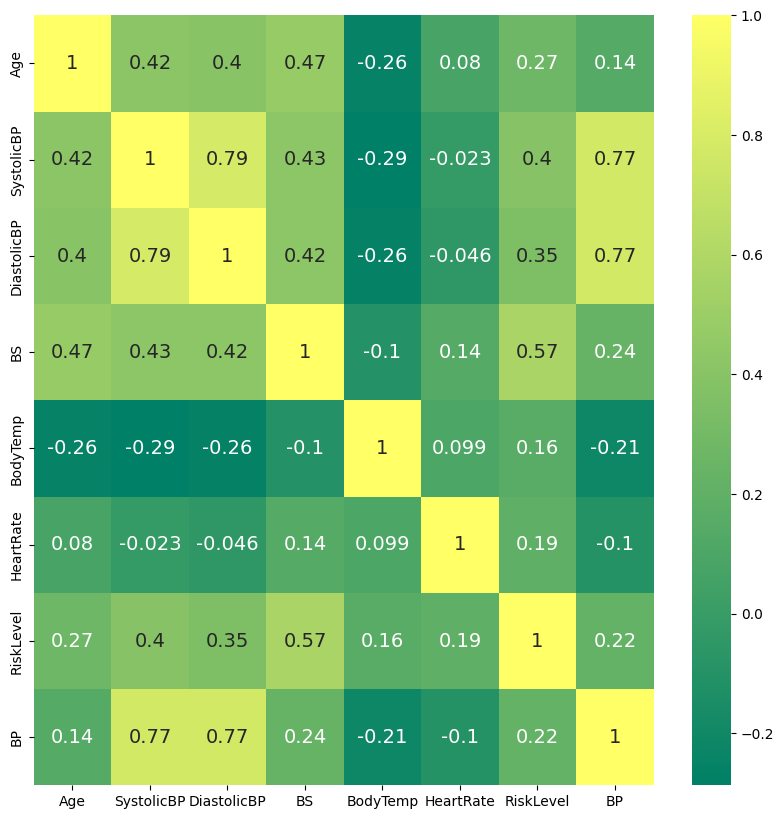

In [ ]:
import seaborn as sns
plt.figure(figsize = (10,10))
#generating heatmap of correlated features
sns.heatmap(df.corr(numeric_only = False), annot = True, cmap = 'summer')

plt.savefig('/content/drive/MyDrive/CSE445/Pre-processing/adding_column_correlation.png')
plt.show()

In [ ]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,BP
0,25,130,80,15.0,98.0,86,3.0,3.0
1,35,140,90,13.0,98.0,70,3.0,3.0
2,29,90,70,8.0,100.0,80,3.0,2.0
3,30,140,85,7.0,98.0,70,3.0,3.0
4,35,120,60,6.1,98.0,76,1.0,2.0


In [ ]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

##Splitting Target and features

In [ ]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel', 'BP'],
      dtype='object')

In [ ]:
Y = df['RiskLevel']
X = df.drop('RiskLevel',axis=1)

In [ ]:
display(Y.to_frame())

,RiskLevel
0,3.0
1,3.0
2,3.0
3,3.0
4,1.0
...,...
1009,3.0
1010,3.0
1011,3.0
1012,3.0


In [ ]:
display(X)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,BP
0,25,130,80,15.0,98.0,86,3.0
1,35,140,90,13.0,98.0,70,3.0
2,29,90,70,8.0,100.0,80,2.0
3,30,140,85,7.0,98.0,70,3.0
4,35,120,60,6.1,98.0,76,2.0
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,2.0
1010,55,120,90,18.0,98.0,60,2.0
1011,35,85,60,19.0,98.0,86,1.0
1012,43,120,90,18.0,98.0,70,2.0


In [ ]:
df.head()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,BP
0,25,130,80,15.0,98.0,86,3.0,3.0
1,35,140,90,13.0,98.0,70,3.0,3.0
2,29,90,70,8.0,100.0,80,3.0,2.0
3,30,140,85,7.0,98.0,70,3.0,3.0
4,35,120,60,6.1,98.0,76,1.0,2.0


In [ ]:
df.to_csv("/content/drive/MyDrive/CSE445/Dataset/After_preprocessing_Maternal-Health-Risk-Data-Set.csv",index=False)